In [18]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math as m
import argparse
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling.models import custom_model
from matplotlib.backends.backend_pdf import PdfPages
import scipy as sp
import uncertainties as unc
import uncertainties
from uncertainties import unumpy as unp
import kcorrect
import kcorrect.utils as ut
from astropy.cosmology import FlatLambdaCDM
import pandas as pd

Defining the Cosmology

In [5]:
cosmo=FlatLambdaCDM(H0=70.0,Om0=0.3)

Creating a function that will label the bars in the bar plot as part of the luminosity function

In [6]:
def autolabel(rects,thecolor,row,col):
         for rect in rects:
                  height=rect.get_height()
                  print(height)
                  if not m.isinf(height):
                           axes[row][col].text(rect.get_x() + rect.get_width()/2.,height+0.05,'{}'.format(int(np.power(10,height))),ha='center',va='bottom',fontsize=7,color=thecolor)

Astropy model to fit the estimated luminosity function with a schechter function

In [7]:
@custom_model
def schechter_func(x,phistar=0.0056,mstar=-21,alpha=-1.03):
    return (0.4*np.log(10)*phistar)*(10**(0.4*(alpha+1)*(mstar-x)))*(np.e**(-np.power(10,0.4*(mstar-x))))

Scipy model to fit the estimated luminosity function with a schechter function

In [8]:
def schechter_func_scipy(x,phistar,mstar,alpha):
    return (0.4*np.log(10)*phistar)*(10**(0.4*(alpha+1)*(mstar-x)))*(np.e**(-np.power(10,0.4*(mstar-x))))

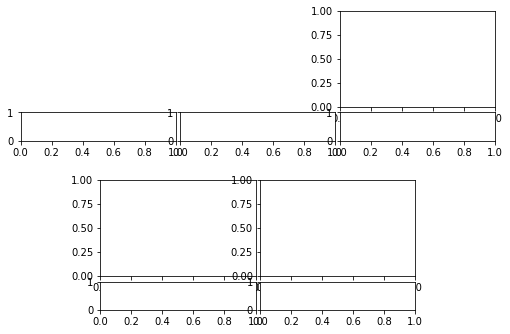

In [17]:
f=plt.figure(figsize=(8.5,5.5))
ax1=plt.subplot2grid((5,10),(0,0),colspan=6,rowspan=3)
ax2=plt.subplot2grid((9,18),(0,6),colspan=6,rowspan=4)
ax3=plt.subplot2grid((9,18),(0,12),colspan=6,rowspan=3)
ax4=plt.subplot2grid((9,18),(3,0),colspan=6)
ax5=plt.subplot2grid((9,18),(3,6),colspan=6)
ax6=plt.subplot2grid((9,18),(3,12),colspan=6)
ax7=plt.subplot2grid((9,18),(5,3),colspan=6,rowspan=3)
ax8=plt.subplot2grid((9,18),(5,9),colspan=6,rowspan=3)
ax9=plt.subplot2grid((9,18),(8,3),colspan=6)
ax10=plt.subplot2grid((9,18),(8,9),colspan=6)
axes=np.array([[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,2],[ax9,ax10,2]])


In [ ]:
gs=gridspec.GridSpec